In [1]:
import sys
sys.path.append(sys.path[0].replace('/Development Notebooks',''))
from group_decomposition import fragfunctions as ff
# from group_decomposition.utils import mol_from_molfile, set_scaffold_params, get_scaffold_vertices, find_smallest_rings, xyz_from_cml
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np

In [2]:
file = open('Data/cml_files.txt','r')
cml_files = file.readlines()
file.close()

In [3]:
t_list = [x.replace('./','').replace('\n','') for x in cml_files]
path_cml = ['Data/'+ x for x in t_list]
# path_cml.remove('Data/DUDE_39835855_ital_decoys_C26H26N3O5S2_CIR.cml')
len(path_cml)

102

Data/DUDE_35915516_esr1_decoys_C29H31F3N3O_CIR.cml
Data/DUDE_08791069_mapk2_decoys_C26H27N4O6_CIR.cml
Data/DUDE_14129583_mmp13_decoys_C24H18F4N6OS_CIR.cml
Data/DUDE_38570445_urok_decoys_C27H27N4O5_CIR.cml
Data/DUDE_36597790_ada17_decoys_C26H28N2O7S_CIR.cml
Data/DUDE_10050109_vgfr2_decoys_C26H34N7O3_CIR.cml
Data/DUDE_15317677_try1_decoys_C27H29N3O6_CIR.cml
Data/DUDE_44737652_urok_decoys_C26H29ClF2N5O2_CIR.cml
Data/DUDE_40000223_ppara_decoys_C26H24N3O5S2_CIR.cml
Data/DUDE_36316357_reni_decoys_C29H40N3O4_CIR.cml
Data/DUDE_66200538_ppara_decoys_C26H23N4O5S_CIR.cml
Data/DUDE_36495973_pa2ga_decoys_C28H38N2O5S_CIR.cml
Data/DUDE_06078538_src_decoys_C28H25ClN4O3_CIR.cml
Data/DUDE_04258917_pde5a_decoys_C26H21F4N3O3_CIR.cml
Data/DUDE_63350531_mmp13_decoys_C27H25N3O6_CIR.cml
Data/DUDE_36601962_bace1_decoys_C27H32N2O6S_CIR.cml
Data/DUDE_13489372_cah2_decoys_C24H35N7O5_CIR.cml
Data/DUDE_16958170_hivpr_decoys_C22H19N6O8_CIR.cml
Data/DUDE_43553909_plk1_decoys_C28H38N2O6_CIR.cml
Data/DUDE_09271201_fnta

[14:34:25] Explicit valence for atom # 13 N, 6, is greater than permitted


Data/DUDE_09407405_ada17_decoys_C25H29N7O4_CIR.cml
Data/DUDE_09041410_ital_decoys_C29H25N3O2S2_CIR.cml
Data/DUDE_35947879_jak2_decoys_C26H27ClN4O4S_CIR.cml
Data/DUDE_16737368_kif11_decoys_C30H21N5O_CIR.cml
Data/DUDE_12376684_bace1_decoys_C28H19ClN4O3_CIR.cml
Data/DUDE_63390328_aces_decoys_C28H27N4O4_CIR.cml
Data/DUDE_33933379_mmp13_decoys_C26H31ClN5O4_CIR.cml
Data/DUDE_12714763_kpcb_decoys_C26H31N5O4S_CIR.cml
CPU times: user 5.86 s, sys: 83.7 ms, total: 5.94 s
Wall time: 6.1 s


,Smiles,xyz,Atoms,Parent,Labels,atom_types,Molecule,count,numAttachments
0,*c1ccc(*)c(*)c1,"[[4.1588143674, 1.419269949, -0.5360845516], [...","[17, 18, 19, 20, 21, 22, 53, 54, 55]",,"[C, C, C, C, C, C, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 33, 3...",,1,3
1,*C1CCC(*)[NH+](*)C1,"[[2.2920256918, -1.9650662525, -0.7330466041],...","[7, 9, 10, 11, 13, 14, 8, 12, 15, 45, 46, 47, ...",,"[C, C, C, C, C, N, H, H, H, H, H, H, H, H, H]","[(C, 39, 4), (C, 25, 4), (C, 25, 4), (C, 35, 4...",,1,3
2,*c1ccc2c(c1*)NC(=O)C21[NH2+]C(*)C2C(=O)N(*)C(=...,"[[5.5366822186, -1.9481884503, -0.3491552227],...","[2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 17, ...",,"[C, C, C, C, C, C, N, C, O, C, C, C, C, N, C, ...","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3...",,1,4
3,*c1ccc2c(c1)OCO2,"[[-3.216792947, -1.3415600881, 1.25822036], [-...","[33, 34, 35, 36, 37, 38, 39, 40, 41, 59, 60, 6...",,"[C, C, C, C, C, C, O, C, O, H, H, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 30, 3...",,1,1
4,*c1cccc(*)c1,"[[6.3394106669, -0.2462534521, -0.0756046181],...","[30, 31, 32, 33, 34, 35, 51, 52, 53, 54]",,"[C, C, C, C, C, C, H, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 19, 3...",,1,2
...,...,...,...,...,...,...,...,...,...
258,*C(*)*,"[[-0.9564874251, 0.0025517217, -2.0039077012],...","[4, 5]",,"[C, H]","[(C, 39, 4), (H, 4, 1)]",,9,3
259,*C(=O)N(*)*,"[[-2.3597545143, 0.0861740646, 0.0069980525], ...","[28, 20, 29]",,"[C, N, O]","[(C, 32, 3), (N, 24, 3), (O, 4, 1)]",,12,3
260,*N,"[[-0.4546385907, -3.0003731701, 3.2634702144],...","[37, 60, 61]",,"[N, H, H]","[(N, 9, 3), (H, 5, 1), (H, 5, 1)]",,9,1
261,*NC(*)=O,"[[-3.4493211249, -0.6985848213, 0.6788798284],...","[8, 7, 9, 45]",,"[C, N, O, H]","[(C, 32, 3), (N, 19, 3), (O, 4, 1), (H, 5, 1)]",,46,2

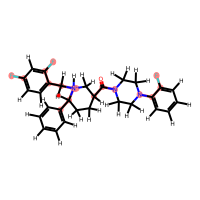
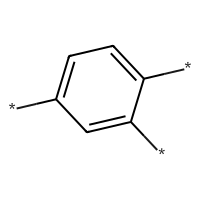
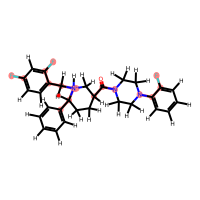
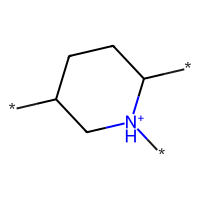
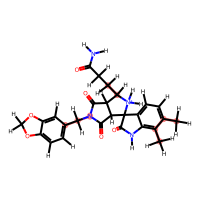
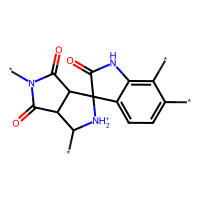
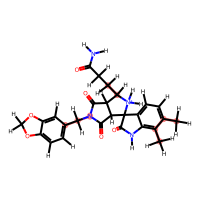
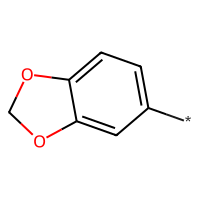
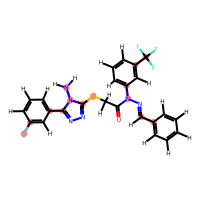
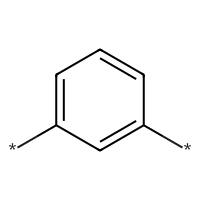
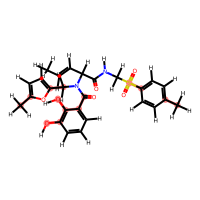
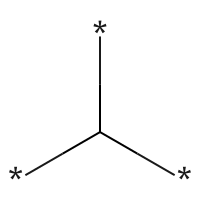
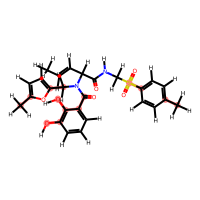
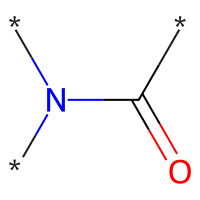
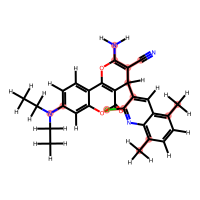
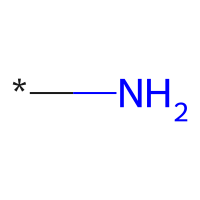
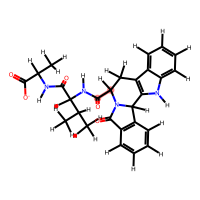
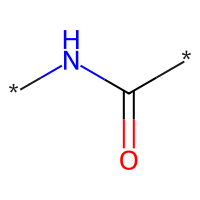
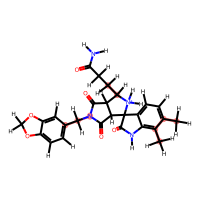
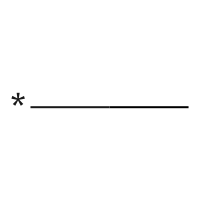

In [4]:
%time ff.count_groups_in_set(path_cml,input_type='cmlfile')

In [5]:
rwmol = Chem.RWMol(Chem.MolFromSmiles('N'))
rwmol.AddAtom(Chem.Atom('H'))

1

In [6]:
n = rwmol.GetAtomWithIdx(0)
n.GetSymbol()

'N'

In [7]:
[x.GetBondType() for x in Chem.MolFromSmiles('[O-]C(=O)CCCCCN1C(=S)S/C(=C/c2c(Oc3ccc(cc3C)C)nc3n(c2=O)cccc3)/C1=O').GetAtomWithIdx(13).GetBonds()]

[rdkit.Chem.rdchem.BondType.DOUBLE, rdkit.Chem.rdchem.BondType.SINGLE]

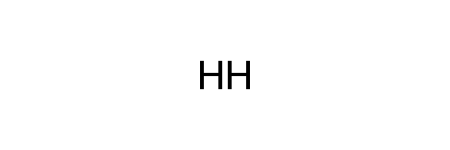

In [8]:
empty_mol = Chem.RWMol(Chem.Mol())
empty_mol.AddAtom(Chem.Atom('H'))
empty_mol


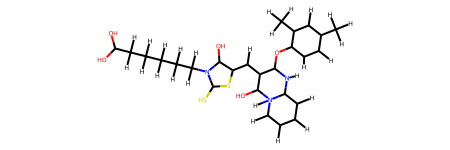

In [9]:
from group_decomposition import utils
cml_file = 'Data/DUDE_39835855_ital_decoys_C26H26N3O5S2_CIR.cml'
xyz_coords, at_types, bond_list,el_list,charge = utils.data_from_cml(cml_file,True)
rwmol = utils.add_cml_single_atoms_bonds(el_list,bond_list)
rwmol

In [10]:
smile = 'Cc1ccc(c(c1)C)Oc2c(c(=O)n3ccccc3n2)/C=C/4\C(=O)N(C(=S)S4)CCCCCC(=O)[O-]'
mol = Chem.MolFromSmiles(smile)
c_at=0
for atom in mol.GetAtoms():
    c_at += atom.GetNumImplicitHs()
print(c_at)

24


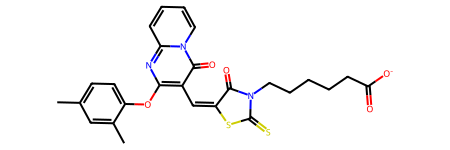

In [11]:
mol